데이터 출처: https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset

## 1. 데이터 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

### 1-1. 데이터 확인

In [2]:
raw_data = pd.read_csv('./data/KR_youtube_trending_data_220722.csv')

In [3]:
raw_data.shape

(139754, 16)

In [4]:
raw_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139754 entries, 0 to 139753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           139754 non-null  object
 1   title              139754 non-null  object
 2   publishedAt        139754 non-null  object
 3   channelId          139754 non-null  object
 4   channelTitle       139754 non-null  object
 5   categoryId         139754 non-null  int64 
 6   trending_date      139754 non-null  object
 7   tags               139754 non-null  object
 8   view_count         139754 non-null  int64 
 9   likes              139754 non-null  int64 
 10  dislikes           139754 non-null  int64 
 11  comment_count      139754 non-null  int64 
 12  thumbnail_link     139754 non-null  object
 13  comments_disabled  139754 non-null  bool  
 14  ratings_disabled   139754 non-null  bool  
 15  description        136183 non-null  object
dtypes: bool(2), int64(5)

### 1-2. 데이터 시각화

---

## 2. 데이터 전처리

### 2-1. 결측치 처리

In [6]:
raw_data.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          3571
dtype: int64

In [7]:
df = raw_data[(raw_data['comments_disabled'] == 0) & (raw_data['ratings_disabled'] == 0) & (raw_data['categoryId'] == 23)].copy()

In [8]:
df.shape

(8755, 16)

In [9]:
df.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          823
dtype: int64

In [10]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)) if pd.isnull(x) is False else 0)

In [11]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,description_length
8,7FOi40uehC4,집에 혼자 있을 때 하는 짓ㅋㅋㅋㅋㅋㅋㅋ [밍꼬발랄],2020-08-12T09:00:02Z,UCCJkwrmhIqWkSFV-sQol4Qw,밍꼬발랄Mingggo,23,2020-08-12T00:00:00Z,밍꼬발랄|밍꼬|꼬밍|발랄|모아보기|이어보기|정주행|꿀잼|꿀팁|유형|유형별|꼭있는유형...,340149,13166,338,5697,https://i.ytimg.com/vi/7FOi40uehC4/default.jpg,False,False,다~해 본 사람 손!![밍꼬 배경화면]_https://grafolio.naver.c...,810
9,0dsnm3n6ZdM,정윤호가 무려 6시간 공들여 만든 세기의 발명품 [발명왕] Ep.1,2020-08-11T09:30:00Z,UC0SoPwEH3idvemSDvKaYgGA,달라스튜디오,23,2020-08-12T00:00:00Z,예능|달라스튜디오|DALLA|정윤호|발명왕|유노윤호|동방신기|TVXQ|신발|아이디어,351264,11125,103,2324,https://i.ytimg.com/vi/0dsnm3n6ZdM/default.jpg,False,False,되게 쓸모 없을 거 같은데 되게 쓸모 있을 거 같은 이 발명품은 뭐지?3:26 ㅅ....,173
11,7Y8Vv_KHp7I,🇺🇲🇪🇸SUB] [몰카] 누가봐도 강도인데 전혀 의심을 안하는 직원을 본다면?!!!...,2020-08-09T11:30:01Z,UCIuFnJrRwHEUcIVtozJnUGA,동네놈들,23,2020-08-12T00:00:00Z,관찰|관찰카메라|실험|실험카메라|prank|prankcam|prankcamera|p...,1354418,21632,1309,1166,https://i.ytimg.com/vi/7Y8Vv_KHp7I/default.jpg,False,False,장소 협찬을 해주신 청담 레스티아(LESTIA) 감사드립니다 :-)청담 레스티아(L...,761
25,2ErtcO2XuYs,자수 하겠습니다 죄송합니다,2020-08-10T12:50:44Z,UCg_lS-XS9Fh9I6Rl56Z8fpg,최고다윽박EUGBAK,23,2020-08-12T00:00:00Z,최고다윽박|자연인|바다|낚시|요리먹방|시골|아프리카TV|국민바보|eugbak|muk...,1118238,32497,2696,11910,https://i.ytimg.com/vi/2ErtcO2XuYs/default.jpg,False,False,죄송합니다,5
27,5UahGcQ5u9k,치킨 본사 쳐들어가서 네고해왔습니다 [네고왕] Ep.1,2020-08-07T09:30:00Z,UC0SoPwEH3idvemSDvKaYgGA,달라스튜디오,23,2020-08-12T00:00:00Z,예능|달라스튜디오|DALLA|치킨|비비큐|BBQ,2963213,166050,1342,18128,https://i.ytimg.com/vi/5UahGcQ5u9k/default.jpg,False,False,9:16 치킨왕 앞에서 쫄리는 법이 없는 천직 네고왕ㅋㅋㅋㅋㅋㅋㅋBBQ 통장에서 5...,386


In [12]:
df = df.fillna('')

In [13]:
df.isnull().sum()

video_id              0
title                 0
publishedAt           0
channelId             0
channelTitle          0
categoryId            0
trending_date         0
tags                  0
view_count            0
likes                 0
dislikes              0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description           0
description_length    0
dtype: int64

### 2-2. 데이터 형식 정제

---

## 3. 머신러닝 모델링

### 3-1. 학습 데이터 분리

In [14]:
X_input = df[['likes', 'dislikes', 'comment_count','description_length']]
y_output = df['view_count']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_input, y_output, random_state=22)

### 3-2. 머신러닝 모델 학습 및 예측

In [16]:
model = RandomForestRegressor(random_state=22)

In [17]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=22)

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
train_score = r2_score(y_train_pred, y_train)
print('Train score:', train_score)

test_score = r2_score(y_test_pred, y_test)
print('Test score:', test_score)

Train score: 0.9967250694793485
Test score: 0.9694462349547971


---

## 4. 결과 정리

### 4-1. 주요 특성 정리

In [20]:
importances = model.feature_importances_

In [21]:
importances

array([0.74375227, 0.09816467, 0.11577721, 0.04230585])

### 4-2. 예측 결과 시각화

In [22]:
features = ['likes', 'dislikes', 'comment_count','description_length']

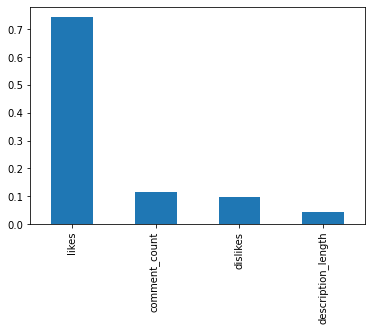

In [23]:
forest_importances = pd.Series(importances, index=features)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);